In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import chardet

In [8]:
import nltk
from nltk import word_tokenize
import string, re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\S.Mani
[nltk_data]     Chandra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\S.Mani
[nltk_data]     Chandra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\S.Mani
[nltk_data]     Chandra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvements
# 7. Websites
# 8. Deployments
     

In [17]:
with open('spam.csv', 'rb') as f:
    result = chardet.detect(f.read())

In [18]:
df = pd.read_csv('spam.csv', encoding=result['encoding'])

In [19]:
df.sample(4)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
207,ham,"Aight yo, dats straight dogg",NaN,NaN,NaN
2061,ham,Hey ! I want you ! I crave you ! I miss you ! ...,NaN,NaN,NaN
3938,ham,Y Ì_ wan to go there? C doctor?,NaN,NaN,NaN
2761,ham,I am not sure about night menu. . . I know onl...,NaN,NaN,NaN


In [20]:
df.shape

(5572, 5)

## 1. Data Cleaning

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [22]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.sample(4)

,v1,v2
5176,ham,Company is very good.environment is terrific a...
5015,ham,Hey gals...U all wanna meet 4 dinner at nÌÂte?
2887,ham,I take it we didn't have the phone callon Frid...
4098,ham,If u dun drive then how i go 2 sch.


In [23]:
# Rename the columns
df.rename(columns={'v1': 'target', 'v2':'text'}, inplace=True)

In [24]:
df.sample(4)

,target,text
4827,ham,Lol no. Just trying to make your day a little ...
3163,ham,TODAY is Sorry day.! If ever i was angry with ...
1860,ham,"It could work, we'll reach a consensus at the ..."
460,ham,Where did u go? My phone is gonna die you have...


In [25]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [26]:
df.target = lb.fit_transform(df.target)

In [27]:
df.sample()

,target,text
2450,0,K..give back my thanks.


In [28]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
# missing values

df.isnull().sum()

target    0
text      0
dtype: int64

In [30]:
# check for duplicate values
df.duplicated().sum()

403

In [31]:
# remove duplicateds

df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [32]:
df.shape

(5169, 2)

## 2. EDA

In [33]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [34]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

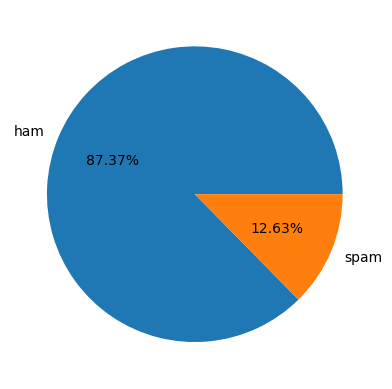

In [41]:
plt.pie(df['target'].value_counts(),labels = ['ham', 'spam'], autopct = "%.2f%%");
plt.show();

In [43]:
df['num_characters']=df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [45]:

df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))
df.head()


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [47]:
df['num_sent'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [48]:
df.describe()

,target,num_characters,num_words,num_sent
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [50]:
df[df['target'] == 0].describe()

,target,num_characters,num_words,num_sent
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.120903,1.799601
std,0.0,56.358207,13.493725,1.278465
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,28.000000


In [51]:
df[df['target'] == 1].describe()

,target,num_characters,num_words,num_sent
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.967841
std,0.0,30.137753,7.008418,1.483201
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,8.000000


In [52]:
df.corr()

,target,num_characters,num_words,num_sent
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sent,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

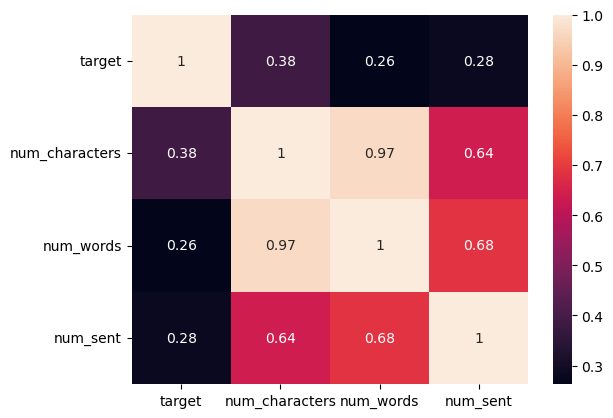

In [53]:
sns.heatmap(df.corr(), annot = True)

## 3. Data Preprocessing

In [54]:
port_stemmer = PorterStemmer()
lan_stemmer = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

In [55]:
# Create a function to generate cleaned data from raw text
def clean_text(text):
    text = word_tokenize(text) # Create tokens
    text= " ".join(text) # Join tokens
    text = [char for char in text if char not in string.punctuation] # Remove punctuations
    text = ''.join(text) # Join the leters
    text = [char for char in text if char not in re.findall(r"[0-9]", text)] # Remove Numbers
    text = ''.join(text) # Join the leters
    text = [word.lower() for word in text.split() if word.lower() not in set(stopwords.words('english'))] # Remove common english words (I, you, we,...)
    text = ' '.join(text) # Join the leters
    # text = list(map(lambda x: lan_stemmer.stem(x), text.split()))
    text = list(map(lambda x: port_stemmer.stem(x), text.split()))
    # text = list(map(lambda x: lemmatizer.lemmatize(x), text.split()))
    return " ".join(text)   # error word

In [56]:
df['Clean_SMS'] = df['text'].apply(clean_text)

In [57]:
df.columns

Index(['target', 'text', 'num_characters', 'num_words', 'num_sent',
       'Clean_SMS'],
      dtype='object')

In [58]:
df.head(5)

,target,text,num_characters,num_words,num_sent,Clean_SMS
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah nt think goe usf live around though


In [59]:
from wordcloud import WordCloud
wc = WordCloud(width = 2000, height = 1000, min_font_size = 10, background_color = 'Black')

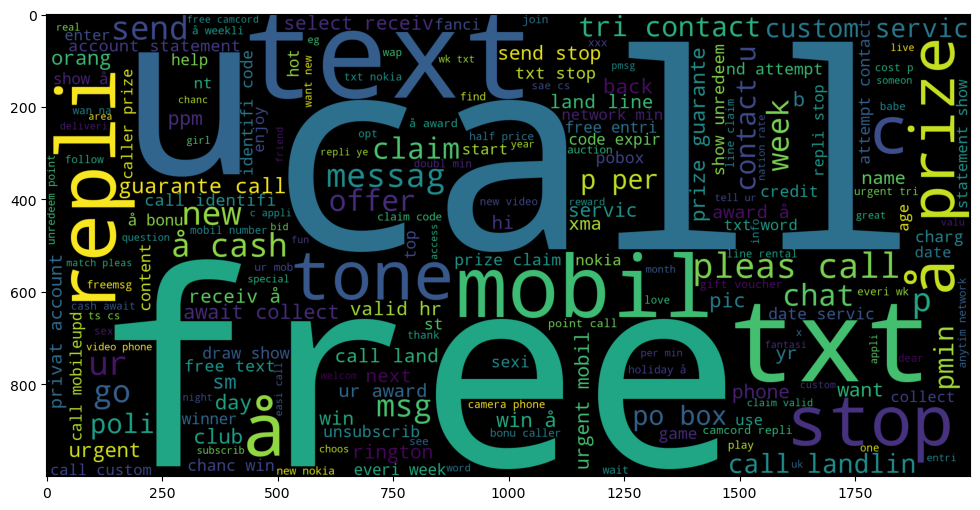

In [62]:
spam_ = wc.generate(df[df['target']==1]['Clean_SMS'].str.cat(sep = " "));
plt.figure(figsize = (15,6))
plt.imshow(spam_);

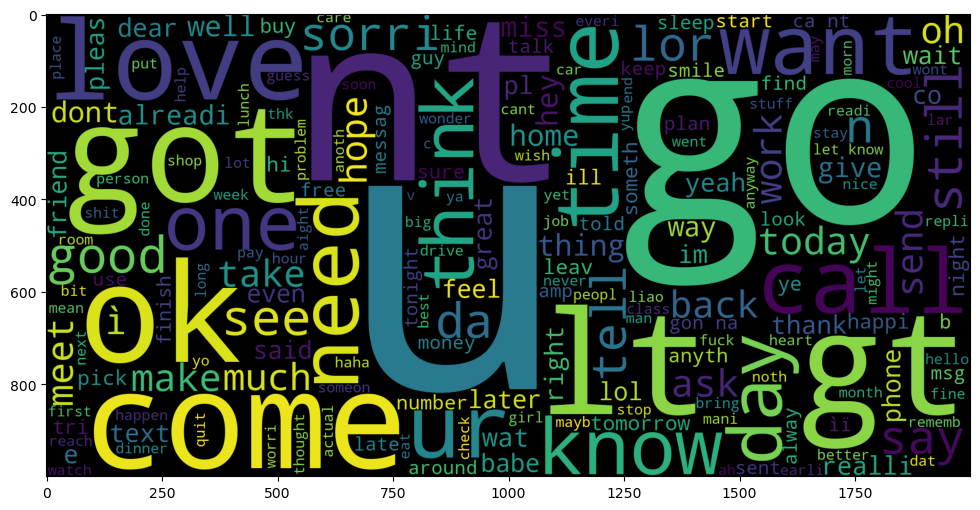

In [65]:
ham_ = wc.generate(df[df['target']==0]['Clean_SMS'].str.cat(sep = " "));
plt.figure(figsize = (15,6))
plt.imshow(ham_);

In [67]:
spam_corpus=[]
for msg in df[df['target']==1]['Clean_SMS'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [68]:
len(spam_corpus)

9529

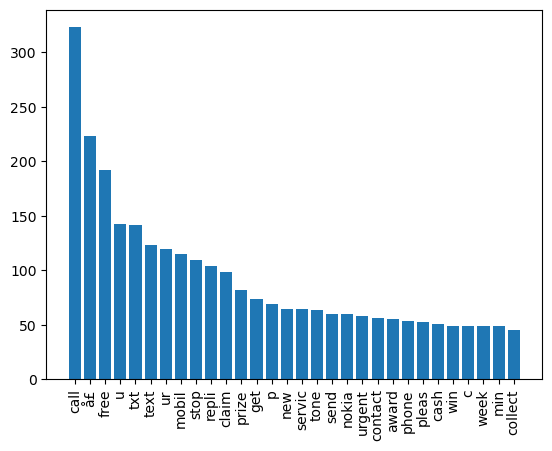

In [71]:
from collections import Counter # Count frequence of word in text
plt.bar(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical');

In [72]:
ham_corpus=[]
for msg in df[df['target']==0]['Clean_SMS'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [73]:
len(ham_corpus)

36001

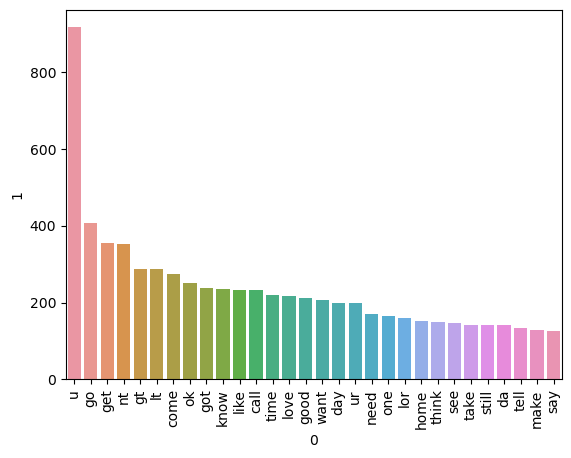

In [74]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

## 4. Model Building

In [75]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer

cv = CountVectorizer
     

In [79]:
# Initialize the TF-IDF vectorizer
tf = TfidfVectorizer(max_features = 3000)

# Fit and transform the text column
X = tf.fit_transform(df['Clean_SMS']).toarray()
X.shape

(5169, 3000)

In [81]:
y = df['target'].values

In [82]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [84]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score, roc_auc_score, mean_squared_error, r2_score, log_loss


In [85]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
     

In [86]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred1)}")
print(confusion_matrix(y_test, y_pred1))
print(f"Precision Score {precision_score(y_test, y_pred1)}")

Accuracy Score: 0.874274661508704
[[793 103]
 [ 27 111]]
Precision Score 0.5186915887850467


In [87]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred2)}")
print(confusion_matrix(y_test, y_pred2))
print(f"Precision Score {precision_score(y_test, y_pred2)}")

Accuracy Score: 0.9738878143133463
[[896   0]
 [ 27 111]]
Precision Score 1.0


In [88]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred3)}")
print(confusion_matrix(y_test, y_pred3))
print(f"Precision Score {precision_score(y_test, y_pred3)}")

Accuracy Score: 0.9816247582205029
[[895   1]
 [ 18 120]]
Precision Score 0.9917355371900827


In [94]:
import pickle

pickle.dump(tf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

# tf , mnb

In [95]:
sms = "“We’re happy to inform you that you’re entitled to a refund for overpayment on your AMEX account. Click on this link [Link] below to claim your refund.”"

In [97]:
tf_idf = pickle.load(open("vectorizer.pkl", 'rb'))
models = pickle.load(open("model.pkl", 'rb'))

In [99]:
# 1. Preprocess
transformed_sms = clean_text(sms)

# 2. Vectorize
vect_input = tf_idf.transform([transformed_sms])

# 3. Predict
result = models.predict(vect_input)[0]

# 4. Display
if result == 1:
      print("Spam")
else:
      print("Not Spam")

Spam


## Multiple Model

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [104]:
models = []
models.append(('Logistic Regression', LogisticRegression()) )
models.append((('Decision Tree Classifier', DecisionTreeClassifier())))
models.append(('Random Forest Classifier', RandomForestClassifier()))
models.append(('Naive bayes', MultinomialNB()))
models.append(('Support Vector Machine', SVC()))
     

In [105]:
models

[('Logistic Regression', LogisticRegression()),
 ('Decision Tree Classifier', DecisionTreeClassifier()),
 ('Random Forest Classifier', RandomForestClassifier()),
 ('Naive bayes', MultinomialNB()),
 ('Support Vector Machine', SVC())]

In [106]:
Model = []
Accuracy = []
Precision = []
Recall = []
F1 = []
for name, model in models:

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    Model.append(name)
    Accuracy.append(round(accuracy_score(y_test, y_pred), 4) * 100)
    Precision.append(round(precision_score(y_test, y_pred), 4) * 100)
    Recall.append(round(recall_score(y_test, y_pred), 4) * 100)
    F1.append(round(f1_score(y_test, y_pred), 4) * 100)

df = pd.DataFrame({'Model': Model, 'Accuracy':Accuracy, 'Precision':Precision, 'Recall':Recall, 'F1 Score':F1})
     


In [107]:
df = df.sort_values(by = 'Precision', ascending = False).reset_index(drop = True)
df
     

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive bayes,97.39,100.00,80.43,89.16
1,Random Forest Classifier,97.39,98.26,81.88,89.33
2,Support Vector Machine,97.10,97.37,80.43,88.10
3,Logistic Regression,95.65,96.97,69.57,81.01
4,Decision Tree Classifier,95.36,81.69,84.06,82.86


In [108]:
df = df.sort_values(by = 'F1 Score', ascending = False).reset_index(drop = True)
df
     

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest Classifier,97.39,98.26,81.88,89.33
1,Naive bayes,97.39,100.00,80.43,89.16
2,Support Vector Machine,97.10,97.37,80.43,88.10
3,Decision Tree Classifier,95.36,81.69,84.06,82.86
4,Logistic Regression,95.65,96.97,69.57,81.01


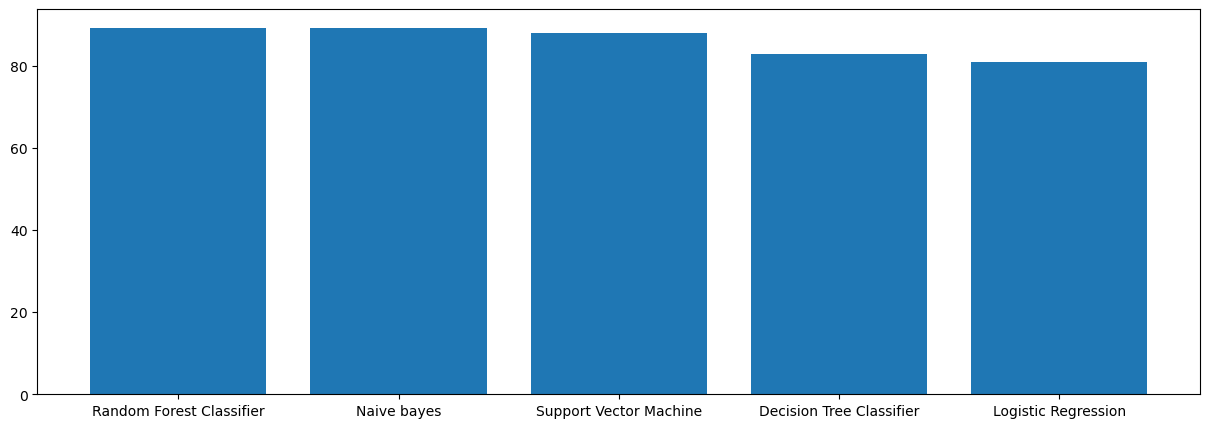

In [109]:
plt.figure(figsize = (15,5))
plt.bar(df['Model'],df['F1 Score']);